In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from src.feature_matching import compute_corners, compute_descriptors, compute_matches, \
visualise_corners, visualise_matches
from src.fundamental_matrix import get_F

# Perform Feature Matching

/home/jonas/Documents/3D_reconstruction_from_scratch/src/feature_matching.py:46: RuntimeWarning: invalid value encountered in sqrt
  threshold = np.trace(M) / 2 - 0.5 * np.sqrt(
/home/jonas/Documents/3D_reconstruction_from_scratch/src/feature_matching.py:47: RuntimeWarning: divide by zero encountered in power
  (np.trace(M)) ** -4 * np.linalg.det(M)
/home/jonas/Documents/3D_reconstruction_from_scratch/src/feature_matching.py:47: RuntimeWarning: invalid value encountered in double_scalars
  (np.trace(M)) ** -4 * np.linalg.det(M)


16 matches calculated: [[442, 151], [952, 292], [1012, 366], [1050, 381], [1053, 402], [1112, 453], [1122, 448], [1225, 549], [1234, 576], [1253, 595], [1306, 645], [1343, 682], [1382, 719], [1481, 818], [1571, 933], [1668, 984]]


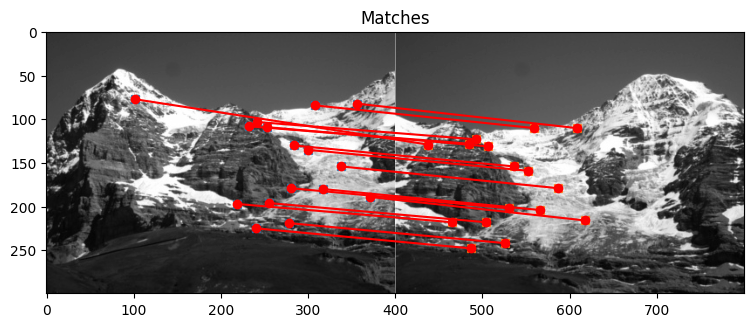

In [2]:
# load images
img1 = np.asarray(Image.open("images/mountain_1.jpg").convert("L"))
img2 = np.asarray(Image.open("images/mountain_2.jpg").convert("L"))
threshold = 220

# can change to cv2 version of func
corners1 = compute_corners(img1, threshold)
corners2 = compute_corners(img2, threshold)

# obtain descriptors for both images
descr1 = compute_descriptors(img1, corners1)
descr2 = compute_descriptors(img2, corners2)

# find feature matches between image1 and image2
matches = compute_matches(descr1, descr2)

print(f"{len(matches)} matches calculated: {matches}")

visualise_matches(img1, img2, corners1, corners2, matches)

# Compute Relative Transformation of Cameras

In [3]:
# get corners indices for set 1 and 2
matches1 = np.array(matches, dtype=int)[:, 0]
matches2 = np.array(matches, dtype=int)[:, 1]

# find points from corners using indices
points1 = np.asarray(corners1[matches1])
points2 = np.asarray(corners2[matches2])

# print(points1, points2)

F = get_F(points1, points2)
print(F)

[[-2.48654026e-06  4.12152254e-05 -6.51192768e-03]
 [-4.12015144e-05 -1.57940851e-06  4.83900369e-03]
 [ 6.55796329e-03 -1.04958723e-02  9.99890497e-01]]
